> Word Importance

If you look at words like "the", "and" or "of", you will see see that they will occur in nearly all English texts. If you keep in mind that our ultimate goal will be to differentiate between texts and attribute them to classes, words like the previously mentioned ones will bear hardly any meaning. If you look at the following corpus, you can see words like "you", "I" or important words like "Python", "lottery" or "Programmer":

In [11]:
#libraries
from sklearn.feature_extraction import text
import pandas as pd

corpus = ["It does not matter what you are doing, just do it!",
          "Would you work if you won the lottery?",
          "You like Python, he likes Python, we like Python, everybody loves Python!"
          "You said: 'I wish I were a Python programmer'",
          "You can stay here, if you want to. I would, if I were you."
         ]

#get model and fit
vectroizer=text.CountVectorizer()
vectroizer.fit(corpus)
print(vectroizer.vocabulary_)                           #check word and its index

#convert to token
token=vectroizer.transform(corpus)
tokenarr=token.toarray()
pd.DataFrame(
    tokenarr,
    columns= vectroizer.get_feature_names_out()
)                                                      #print each word occurence in each sentence

dict_items([('it', 9), ('does', 3), ('not', 16), ('matter', 15), ('what', 26), ('you', 31), ('are', 0), ('doing', 4), ('just', 10), ('do', 2), ('would', 30), ('work', 29), ('if', 8), ('won', 28), ('the', 21), ('lottery', 13), ('like', 11), ('python', 18), ('he', 6), ('likes', 12), ('we', 24), ('everybody', 5), ('loves', 14), ('said', 19), ('wish', 27), ('were', 25), ('programmer', 17), ('can', 1), ('stay', 20), ('here', 7), ('want', 23), ('to', 22)])


,are,can,do,does,doing,everybody,he,here,if,it,...,to,want,we,were,what,wish,won,work,would,you
0,1,0,1,1,1,0,0,0,0,2,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,1,2
2,0,0,0,0,0,1,1,0,0,0,...,0,0,1,1,0,1,0,0,0,2
3,0,1,0,0,0,0,0,1,2,0,...,1,1,0,1,0,0,0,0,1,3


In [12]:
#Get tfid and fit
'''
Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency. 
This is a common term weighting scheme in information retrieval, that has also found good use 
in document classification.
'''
freq=text.TfidfTransformer()
freq.fit(token)


#print frequency of each word weighted by its frequency
thefunny=list(zip(vectroizer.get_feature_names_out(), freq.idf_))
thefunny.sort(key= lambda x:x[1])                       #sort by the 2nd element
for word, frequency in thefunny:
    print(f'{word:15s}:     {frequency}')

#get frequency of the word "loves"
print(f'Freq of loves:   {freq.idf_[vectroizer.vocabulary_["loves"]]}')
#get the occurence of the word "love" in each sentence
print(f'{tokenarr[:,[vectroizer.vocabulary_["loves"]]]}')

you            :     1.0
if             :     1.5108256237659907
were           :     1.5108256237659907
would          :     1.5108256237659907
are            :     1.916290731874155
can            :     1.916290731874155
do             :     1.916290731874155
does           :     1.916290731874155
doing          :     1.916290731874155
everybody      :     1.916290731874155
he             :     1.916290731874155
here           :     1.916290731874155
it             :     1.916290731874155
just           :     1.916290731874155
like           :     1.916290731874155
likes          :     1.916290731874155
lottery        :     1.916290731874155
loves          :     1.916290731874155
matter         :     1.916290731874155
not            :     1.916290731874155
programmer     :     1.916290731874155
python         :     1.916290731874155
said           :     1.916290731874155
stay           :     1.916290731874155
the            :     1.916290731874155
to             :     1.9162907318741

Term Frequency

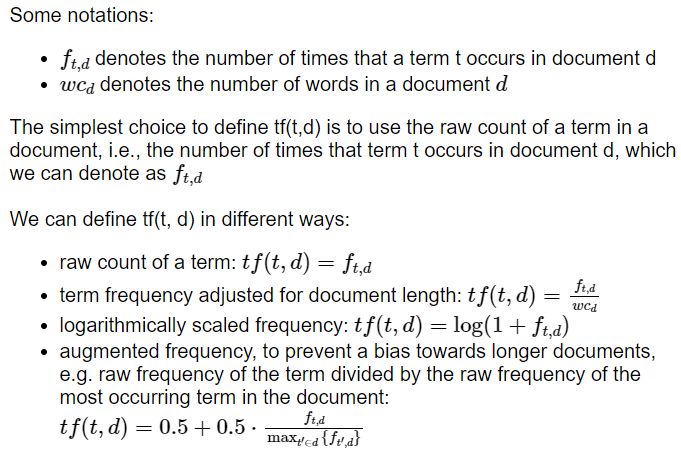

In [4]:
from numpy import log

def tf(t, d, mode=("raw", "length", "log", "augfeq")):
    if mode==("raw", "length", "log", "augfeq"): mode="raw"
    """ The Term Frequency 'tf' calculates how often a term 't' 
        occurs in a document 'd'.  ('d': document index)
        If t_in_d =  Number of times a term t appears in a document d
        and no_terms_d = Total number of terms in the document, 
        tf(t, d) = t_in_d / no_terms_d
        
    """
    if t in vectroizer.vocabulary_:
        word_ind = vectroizer.vocabulary_[t]
        t_occurences = tokenarr[d, word_ind]    # 'd' is the document index
    else:
        t_occurences = 0
    if mode == "raw":
        result =  t_occurences
    elif mode == "length":
        all_terms = (tokenarr[d] > 0).sum()  # calculate number of different terms in d
        result = t_occurences / all_terms
    elif mode == "log":
        result = log(1 + t_occurences)
    elif mode == "augfreq":
        result = 0.5 + 0.5 * t_occurences / ((tokenarr[d]).max())
    
    return result

#comparison of the method cuz why not
print("   raw    length   log     augmened frequency")
for word in ["does", "work", "loves"]:
    for index in  range(len(corpus)):
        d = corpus[index]
        print(f'"{word}" in "{d}"')
        for method in ["raw", "length", "log", "augfreq"]:
            lol=tf(word, index , mode=method)
            print(f'{lol:7.2f}', end=" ")
        print("")

   raw    length   log     augmened frequency
"does" in "It does not matter what you are doing, just do it!"
   1.00    0.10    0.69    0.75 
"does" in "Would you work if you won the lottery?"
   0.00    0.00    0.00    0.50 
"does" in "You like Python, he likes Python, we like Python, everybody loves Python!You said: 'I wish I were a Python programmer'"
   0.00    0.00    0.00    0.50 
"does" in "You can stay here, if you want to. I would, if I were you."
   0.00    0.00    0.00    0.50 
"work" in "It does not matter what you are doing, just do it!"
   0.00    0.00    0.00    0.50 
"work" in "Would you work if you won the lottery?"
   1.00    0.14    0.69    0.75 
"work" in "You like Python, he likes Python, we like Python, everybody loves Python!You said: 'I wish I were a Python programmer'"
   0.00    0.00    0.00    0.50 
"work" in "You can stay here, if you want to. I would, if I were you."
   0.00    0.00    0.00    0.50 
"loves" in "It does not matter what you are doing, just do

Document Frequency--

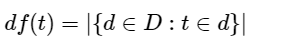

Inverse Document Frequency

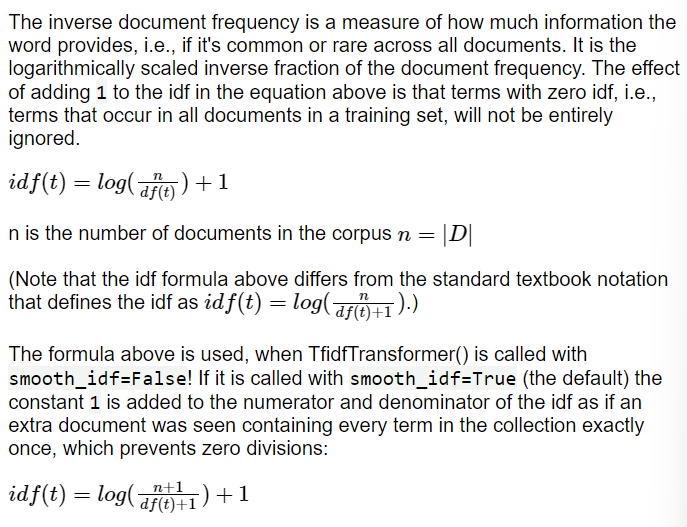

Term Frequency-Inverse Document

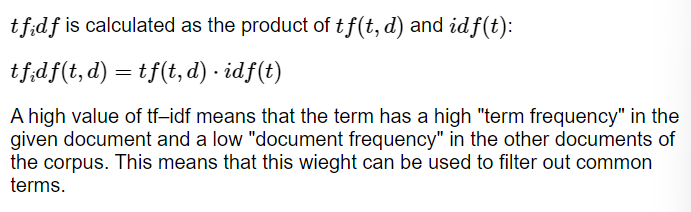

In [5]:
n=len(corpus)

def df(t):
    """ df(t) is the document frequency of t; the document frequency is 
        the number of documents  in the document set that contain the term t. """
    
    word_ind = vectroizer.vocabulary_[t]

    tf_in_docus = tokenarr[:, word_ind] # vector with the freqencies of word_ind in all docus
    existence_in_docus = tf_in_docus > 0 # binary vector, existence of word in docus
    return existence_in_docus.sum()
    
#df("would", vectorizer) 

def idf(t, smooth_idf=True):
    """ idf """
    if smooth_idf:
        return log((1 + n) / (1 + df(t)) ) + 1
    else:
        return log(n / df(t) ) + 1

def tf_idf(t, d):
    return idf(t) * tf(t, d)
    

#using idf (fuck israel defense forces man 🤮)
res_idf = []
for word  in vectroizer.get_feature_names_out():
    tf_docus = []
    res_idf.append([word, idf(word)])
res_idf.sort(key=lambda x:x[1])
for item  in res_idf:
    print(item)
#almost the same thing as these codes cuh (look up for thefunny up there)
'''for word, frequency in thefunny:
    print(f'{word:5s}:  {frequency:.2f}')'''
    
#using tf_idf 
for word, index in vectroizer.vocabulary_.items():
    print(f'{word:12s}: ', end="")
    for sentence in range(n):
        print(f'{sentence:2d}  {tf_idf(word, sentence):.3f}|', end="")
    print("")

['you', 1.0]
['if', 1.5108256237659907]
['were', 1.5108256237659907]
['would', 1.5108256237659907]
['are', 1.916290731874155]
['can', 1.916290731874155]
['do', 1.916290731874155]
['does', 1.916290731874155]
['doing', 1.916290731874155]
['everybody', 1.916290731874155]
['he', 1.916290731874155]
['here', 1.916290731874155]
['it', 1.916290731874155]
['just', 1.916290731874155]
['like', 1.916290731874155]
['likes', 1.916290731874155]
['lottery', 1.916290731874155]
['loves', 1.916290731874155]
['matter', 1.916290731874155]
['not', 1.916290731874155]
['programmer', 1.916290731874155]
['python', 1.916290731874155]
['said', 1.916290731874155]
['stay', 1.916290731874155]
['the', 1.916290731874155]
['to', 1.916290731874155]
['want', 1.916290731874155]
['we', 1.916290731874155]
['what', 1.916290731874155]
['wish', 1.916290731874155]
['won', 1.916290731874155]
['work', 1.916290731874155]
it          :  0  3.833| 1  0.000| 2  0.000| 3  0.000|
does        :  0  1.916| 1  0.000| 2  0.000| 3  0.000|
n

In [6]:
words="Your life is nothing, you serve zero purpose, you should kill yourself NOW, and give somebody else a piece of that oxygen in the ozone layer that's covered up so we can breathe inside of this blue trapped bubble."
words= words.split()
cropus=[words[0]]
for i in range(1, len(words)+1):
    cropus.append(" ".join(words[:i]))
    
#get token
vectorizer=text.CountVectorizer()
token2=vectorizer.fit_transform(cropus)
token2arr=token2.toarray()

pd.DataFrame(token2arr, columns=vectorizer.get_feature_names_out())

,and,blue,breathe,bubble,can,covered,else,give,in,inside,...,that,the,this,trapped,up,we,you,your,yourself,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,1


In [7]:
#get frequency
freq2=text.TfidfTransformer()
freq2.fit(token2)

#print each frequench of word (weighted)
thefunny2 = list(zip(vectorizer.get_feature_names_out(), freq2.idf_))
thefunny2.sort(key=lambda x: x[1])

for word, frequency in thefunny2:
    print(f'{word:10s}:{frequency:10.6f}')

your      :  1.000000
life      :  1.050010
is        :  1.075986
nothing   :  1.102654
you       :  1.130053
serve     :  1.158224
zero      :  1.187212
purpose   :  1.217065
should    :  1.279585
kill      :  1.312375
yourself  :  1.346276
now       :  1.381368
and       :  1.417735
give      :  1.455476
somebody  :  1.494696
else      :  1.535518
piece     :  1.622530
of        :  1.669050
that      :  1.717840
oxygen    :  1.769133
in        :  1.823200
the       :  1.880359
ozone     :  1.940983
layer     :  2.005522
covered   :  2.148623
up        :  2.228665
so        :  2.315677
we        :  2.410987
can       :  2.516347
breathe   :  2.634131
inside    :  2.767662
this      :  3.104134
blue      :  3.327278
trapped   :  3.614960
bubble    :  4.020425


In [8]:
#we gonna change it to tfidf cuz why not?
bleh = text.TfidfTransformer(smooth_idf=True, use_idf=True)
bleh.fit_transform(token2)


#print each frequench of word (weighted)
thefunny3 = list(zip(vectorizer.get_feature_names_out(), bleh.idf_))
thefunny3.sort(key=lambda x: x[1])

for word, frequency in thefunny2:
    print(f'{word:10s}:{frequency:10.6f}')

your      :  1.000000
life      :  1.050010
is        :  1.075986
nothing   :  1.102654
you       :  1.130053
serve     :  1.158224
zero      :  1.187212
purpose   :  1.217065
should    :  1.279585
kill      :  1.312375
yourself  :  1.346276
now       :  1.381368
and       :  1.417735
give      :  1.455476
somebody  :  1.494696
else      :  1.535518
piece     :  1.622530
of        :  1.669050
that      :  1.717840
oxygen    :  1.769133
in        :  1.823200
the       :  1.880359
ozone     :  1.940983
layer     :  2.005522
covered   :  2.148623
up        :  2.228665
so        :  2.315677
we        :  2.410987
can       :  2.516347
breathe   :  2.634131
inside    :  2.767662
this      :  3.104134
blue      :  3.327278
trapped   :  3.614960
bubble    :  4.020425
